In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import collections

plt.rcParams["figure.figsize"] = (24, 6)

In [57]:
DAY = 'friday'

In [3]:
def get_data(day):
    '''
    Loading the csv file into dataframe
    '''
    df = pd.read_csv(f'data/{day}.csv', sep=';')
    # Changes timestamps into datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp']).dt.time
    return df

In [58]:
df_mo = get_data(DAY)
df_mo

,timestamp,customer_no,location
0,07:00:00,1,dairy
1,07:00:00,2,drinks
2,07:00:00,3,fruit
3,07:01:00,2,checkout
4,07:01:00,4,drinks
...,...,...,...
5120,21:50:00,1500,dairy
5121,21:50:00,1507,checkout
5122,21:50:00,1508,checkout
5123,21:50:00,1509,drinks


In [5]:
def customers_per_section(df):
    '''
    Number of customers in each section

    Argument: Dataframe
    Returns: Series with location as index
    '''
    return df.groupby('location')['customer_no'].count()

In [59]:
customers_per_section(get_data(DAY))

location
checkout    1502
dairy        932
drinks       844
fruit       1057
spices       790
Name: customer_no, dtype: int64

In [7]:
def customer_time_per_section(df):
    ''' 
    Number of customers in each section over time

    Argument: Dataframe
    Returns: Series with multi-index (location and timestamp) and the customer count
    '''
    return df.groupby(['location','timestamp'])['customer_no'].count()

In [8]:
customer_time_per_section(get_data(DAY))

location  timestamp
checkout  07:05:00     2
          07:06:00     2
          07:07:00     1
          07:08:00     3
          07:09:00     1
                      ..
spices    21:43:00     1
          21:44:00     1
          21:46:00     2
          21:48:00     1
          21:49:00     2
Name: customer_no, Length: 2797, dtype: int64

In [9]:
def plot_num_of_customer_at_location(df, loc='checkout'):
    '''
    Plotting the number of customers at a specific location in the supermarket

    Arguments: Dataframe and location as string
    Returns: Plot with number of customers at a specific location over time 
    '''
    df_temp = df.groupby(['location','timestamp'])['customer_no'].count()

    df_temp.xs(loc).plot(kind='line')
    plt.title(f'Number of customers at {loc} during one day')

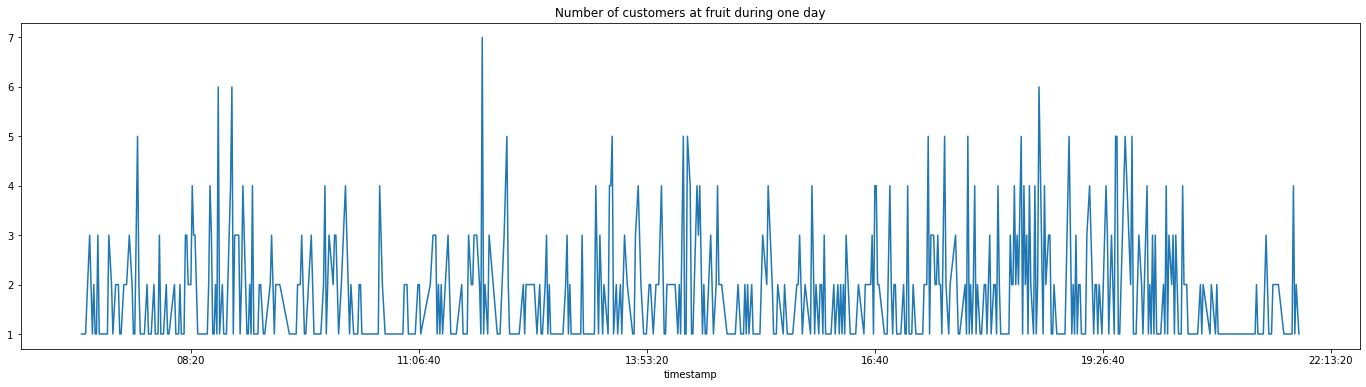

In [60]:
plot_num_of_customer_at_location(get_data(DAY), 'fruit')

In [11]:
def customer_time_in_market(df):
    '''
    This function calculates the time each customer have spent in the supermarket

    Arguments:  A dataframe with the columns "timestamp" of type datetime and "customer_no"
    Returns: A modified dataframe with customer_no and time_in_shop(min) as columns
    '''
    # Transform datetime data into absolute values in minutes
    lst = []
    for i in range(len(df)):
        lst.append(df['timestamp'][i].hour * 60 + df['timestamp'][i].minute)
    # Create new column with absolute times in minutes
    df['minutes_abs'] = lst
    
    # Calculate the timespan of customers spent in the supermarket in minutes
    difference = []
    customers = df.customer_no.unique().tolist()
    for i in df.customer_no.unique().tolist():
        difference.append(df[df['customer_no']==i]['minutes_abs'].diff().dropna().sum())

    # Zipping the customer numbers with the difference in time into a new dataframe
    return pd.DataFrame(list(zip(customers, difference)), columns = ['customer_no', 'time_in_shop(min)'])

In [12]:
customer_time_in_market(get_data(DAY)).head(3)

,customer_no,time_in_shop(min)
0,1,2.0
1,2,3.0
2,3,2.0


<AxesSubplot:title={'center':'The time each customer spent in the supermarket'}, xlabel='customer_no'>

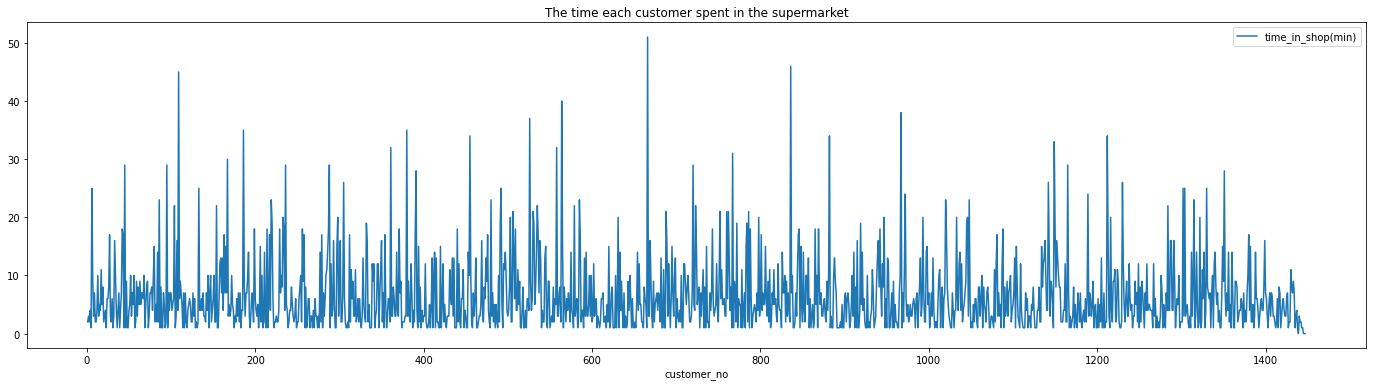

In [13]:
# Plotting the output of the function `customer_in_market_time`
customer_time_in_market(get_data(DAY)).plot(x='customer_no', y='time_in_shop(min)', title='The time each customer spent in the supermarket')

In [14]:
def total_num_of_customers(df):
    '''
    Calculates the number of customers over time

    Argument: Dataframe
    Returns: Series with timestamp as index and the number of customers at the given time
    '''
    return df.groupby('timestamp')['customer_no'].count()

In [15]:
total_num_of_customers(get_data(DAY))

timestamp
07:03:00    2
07:04:00    6
07:05:00    4
07:06:00    8
07:07:00    4
           ..
21:46:00    6
21:47:00    6
21:48:00    7
21:49:00    7
21:50:00    2
Name: customer_no, Length: 874, dtype: int64

<AxesSubplot:title={'center':'Total customers in the supermarket over time'}, xlabel='timestamp'>

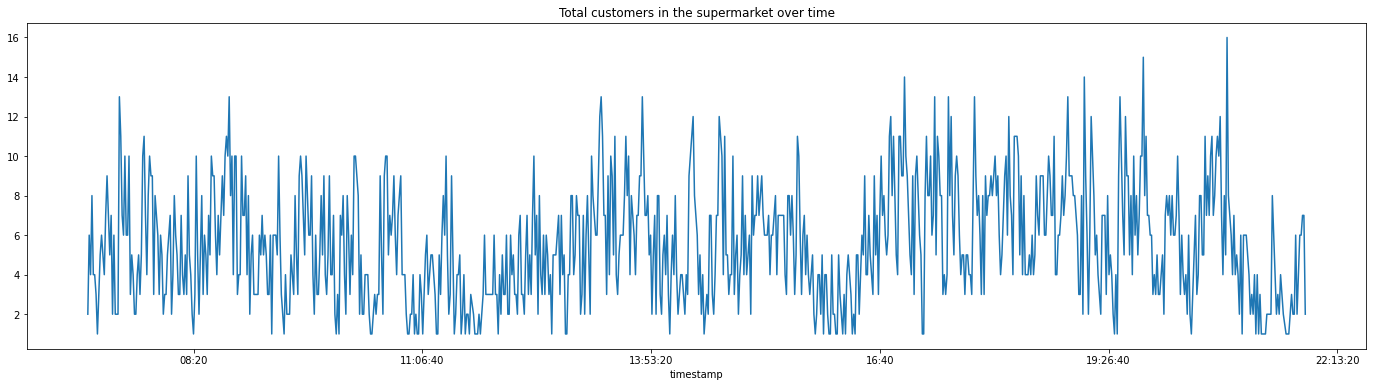

In [16]:
total_num_of_customers(get_data(DAY)).plot(title='Total customers in the supermarket over time')

In [17]:
customer_time_per_section(get_data(DAY))

location  timestamp
checkout  07:05:00     2
          07:06:00     2
          07:07:00     1
          07:08:00     3
          07:09:00     1
                      ..
spices    21:43:00     1
          21:44:00     1
          21:46:00     2
          21:48:00     1
          21:49:00     2
Name: customer_no, Length: 2797, dtype: int64

In [18]:
def start_location_of_customers(df):
    ''' 
    This calculates the distribution of the customers first location after they haved entered the supermarket

    Argument: Dataframe
    Returns: Dictionary with the location as key and the number of customers as value
    '''
    # Creating a list of the first location of every individual customer
    lst = []
    for i in df.customer_no.unique().tolist():
        lst.append(df[df['customer_no']==i].iloc[0]['location'])
    
    # Creating a dictionary by counting the identical items of the created list
    return dict(collections.Counter(lst))


In [19]:
def print_start_location_of_customers(d):
    ''' 
    This prints the dictionary created in the function `start_location_of_customers`

    Argument: Dictionary
    Returns: plot
    '''
    keys = d.keys()
    values = d.values()
    plt.figure(figsize=(8, 6))
    plt.bar(keys, values)
    plt.title('Distribution of the customers first location after entering the supermarket')
    return plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

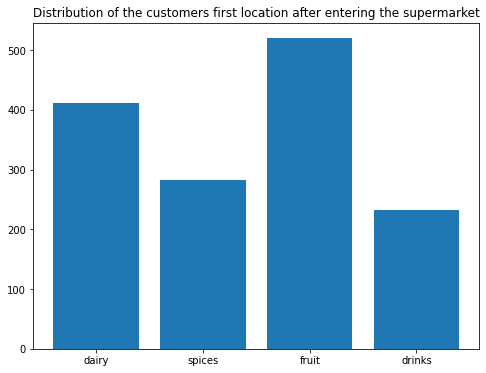

In [20]:
print_start_location_of_customers(start_location_of_customers(get_data(DAY)))

In [21]:
def customer_path(df):
    ''' 
    This calculates the path of each customer through the supermarket

    Argument: Dataframe 
    Return: Dictionary with customer_no as keys and list of locations (path through supermarket) as values
    '''
    d = dict()
    # Loop through a list which contains every customer
    for i in df_mo.customer_no.unique().tolist():
        lst = []
        # Loop through the length of the location of each customer 
        # and append the locations into a list which will be the value
        # in the dictionary for a specific key(=customer_no)
        for j in range(len(df_mo[df_mo['customer_no']==i])):
            lst.append(df_mo[df_mo['customer_no']==i].iloc[j]['location'])
            d[i] = lst
    return d

In [22]:
customer_path(get_data(DAY))

{1: ['dairy', 'checkout'],
 2: ['dairy', 'checkout'],
 3: ['dairy', 'checkout'],
 4: ['dairy', 'checkout'],
 5: ['spices', 'checkout'],
 6: ['spices',
  'dairy',
  'spices',
  'drinks',
  'spices',
  'dairy',
  'spices',
  'checkout'],
 7: ['spices', 'drinks', 'spices', 'fruit', 'checkout'],
 8: ['fruit', 'checkout'],
 9: ['dairy', 'fruit', 'checkout'],
 10: ['fruit', 'checkout'],
 11: ['drinks', 'checkout'],
 12: ['spices', 'drinks', 'checkout'],
 13: ['dairy', 'spices', 'dairy', 'fruit', 'checkout'],
 14: ['fruit', 'checkout'],
 15: ['spices', 'fruit', 'checkout'],
 16: ['dairy', 'spices', 'checkout'],
 17: ['fruit', 'checkout'],
 18: ['fruit', 'dairy', 'checkout'],
 19: ['spices', 'drinks', 'checkout'],
 20: ['drinks', 'checkout'],
 21: ['drinks', 'spices', 'checkout'],
 22: ['fruit', 'dairy', 'checkout'],
 23: ['fruit', 'checkout'],
 24: ['drinks', 'checkout'],
 25: ['spices', 'dairy', 'spices', 'drinks', 'checkout'],
 26: ['fruit', 'dairy', 'checkout'],
 27: ['spices', 'dairy', 'c

In [23]:
def locations_to_list(df, d):
    ''' 
    This takes the dictionary with customer_no as key and 
    a list of location(=path throught supermarket) as value

    Arguments: Dataframe and dictionary
    Returns: List of the consecutive locations of all customers together
    '''
    lst = []
    for i in df.customer_no.unique().tolist():
        for j in range(len(d[i])):
            lst.append(d[i][j])
    return lst

In [24]:
lst_1 = locations_to_list(get_data(DAY), customer_path(get_data(DAY)))

In [25]:
def make_pairs(list):
    """
    Function to return a list of pair of words that follow each other in 
    a piece of text.
    
    args:
        list: input text
        
    returns: 
        list_i: 2 dimensional list where each element is a pair of words.
    """
    list_i = []
    for index, word in enumerate(list):
        if list[index-1] == 'checkout':
            continue
        elif index!=0:
            list_i.append([list[index-1],list[index]])
        
    return list_i

In [26]:
pairs = make_pairs(lst_1)

In [27]:
pairs

[['dairy', 'checkout'],
 ['dairy', 'checkout'],
 ['dairy', 'checkout'],
 ['dairy', 'checkout'],
 ['spices', 'checkout'],
 ['spices', 'dairy'],
 ['dairy', 'spices'],
 ['spices', 'drinks'],
 ['drinks', 'spices'],
 ['spices', 'dairy'],
 ['dairy', 'spices'],
 ['spices', 'checkout'],
 ['spices', 'drinks'],
 ['drinks', 'spices'],
 ['spices', 'fruit'],
 ['fruit', 'checkout'],
 ['fruit', 'checkout'],
 ['dairy', 'fruit'],
 ['fruit', 'checkout'],
 ['fruit', 'checkout'],
 ['drinks', 'checkout'],
 ['spices', 'drinks'],
 ['drinks', 'checkout'],
 ['dairy', 'spices'],
 ['spices', 'dairy'],
 ['dairy', 'fruit'],
 ['fruit', 'checkout'],
 ['fruit', 'checkout'],
 ['spices', 'fruit'],
 ['fruit', 'checkout'],
 ['dairy', 'spices'],
 ['spices', 'checkout'],
 ['fruit', 'checkout'],
 ['fruit', 'dairy'],
 ['dairy', 'checkout'],
 ['spices', 'drinks'],
 ['drinks', 'checkout'],
 ['drinks', 'checkout'],
 ['drinks', 'spices'],
 ['spices', 'checkout'],
 ['fruit', 'dairy'],
 ['dairy', 'checkout'],
 ['fruit', 'checkout'

In [28]:
def trans_prop_matrix(pairs):
    ''' 
    This calculates the transition probability matrix

    Argument: list with lists as items which are pairs of locations [[location_1, location_2], [location_2, ...], [...], ...]
    Retruns: Dataframe as transition probability matrix
    '''
    # Creating a dataframe with two columns `before` and `after`
    df = pd.DataFrame(pairs, columns=['before', 'after'])

    # Calculate the transition probability matrix
    trans_prop_matrix = pd.crosstab(df['after'], df['before'], normalize=0)

    return trans_prop_matrix

In [29]:
trans_prop_matrix(pairs)

before,dairy,drinks,fruit,spices
after,,,,
checkout,0.215727,0.296451,0.364649,0.123173
dairy,0.002062,0.047423,0.463918,0.486598
drinks,0.384480,0.000000,0.232804,0.382716
fruit,0.370902,0.381148,0.002049,0.245902
spices,0.394456,0.345416,0.260128,0.000000


In [54]:
# Set an initial state distribution vector with all customers in the entrance
state = np.array([0.0, 0.0, 0.0, 0.0, 0.0]) # [checkout, dairy, drinks, fruit, spices]
#Store the state distribution in a result object (dictionary)
result = dict()
# Transform the transition probability matrix from a dataframe to numpy array
P = trans_prop_matrix(pairs).to_numpy(dtype=float)

In [55]:
state.shape

(5,)

In [56]:
np.dot(state, P)

array([0., 0., 0., 0.])

In [53]:
# Calculate the next state as a dot product of state vector `state` and transition probability matrix `P`
for i in range(10):
    result[i] = state
    state = np.dot(state, P)

result

ValueError: shapes (4,) and (5,4) not aligned: 4 (dim 0) != 5 (dim 0)